# Calendar Spread

To implement this [strategy](https://www.investopedia.com/terms/c/calendarspread.asp), the trader sells a short-term option (either a call or a put) and buys a long-term option of same type, both options with the same strike. As such, it is a debit spread, the maximum loss being the amount paid for the strategy.

To begin with our calculations and analysis, the necessary resources, such as the *Strategy* class from the *Strategy* module of the *Optx* package, must be imported.

In [1]:
from Optx.Strategy import Strategy
from time import time
from numpy import zeros
import matplotlib.pyplot as plt
%matplotlib inline

A *Strategy* object must then be created.

In [2]:
st=Strategy()

The data used in the calculations are passed to the *getdata* method of the newly created *Strategy* object.

In this case, the underlying asset is Apple stock (ticker: \$APPL). We consider the spot price on January 18, 2021. The maturities of the long and short call options were January 29, 2021 and February 12, 2021, respectively.

The cost of the long-term call option was 5.90 whereas the short-term call option was worth a premium of 4.60.

A (log)normal distribution of stock prices, assuming risk neutrality, as in the Black-Scholes model, was used to estimate the probability of profit at the target date, which corresponds to the expiration of the short-term call option.

In [3]:
distribution="normal-risk-neutral"
stockprice=127.14
volatility=0.427
startdate="2021-01-18"
targetdate="2021-01-29"
interestrate=0.0009
minstock=stockprice-round(stockprice*0.5,2)
maxstock=stockprice+round(stockprice*0.5,2)
strategy=[{"type":"call","strike":127.00,"premium":4.60,"n":1000,"action":"sell"},
          {"type":"call","strike":127.00,"premium":5.90,"n":1000,"action":"buy","expiration":"2021-02-12"}]

st.getdata(stockprice=stockprice,startdate=startdate,targetdate=targetdate,volatility=volatility,interestrate=interestrate,
           minstock=minstock,maxstock=maxstock,strategy=strategy,distribution=distribution)

The payoff and **probability of profit** (PoP) of this calendar spread are calculated by calling the *run* method of the *Strategy* object.

In [4]:
start=time()
st.run()
end=time()
print("Time elapsed: %f s" % (end-start))

Time elapsed: 0.079262 s


Profit/loss data is obtained via a call to the *getprofit* method and plotted for the calendar spreat at the target date.

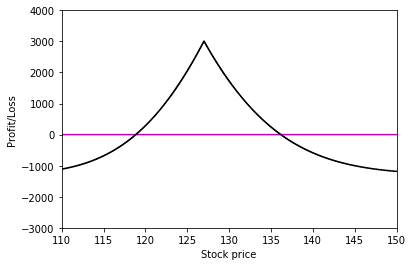

In [5]:
s,pl_total=st.getPL()
zeroline=zeros(s.shape[0])
plt.xlabel("Stock price")
plt.ylabel("Profit/Loss")
plt.xlim(110,150)
plt.ylim(-3000,4000)
plt.plot(s,zeroline,'m-')
plt.plot(s,pl_total,'k-')

Below one can see some useful, additional results of the calculations made for the strategy, including its PoP.

In [6]:
maxloss,maxprofit=st.getmaxPL()

print("Maximum loss: %.2f" % abs(maxloss))
print("Maximum profit: %.2f" % maxprofit)

profitbounds=st.getprofitbounds()

print("Profitable stock price range:")

for i in range(len(profitbounds)):
    print("      %.2f ---> %.2f" % (profitbounds[i][0],profitbounds[i][1]))

print("Probability of Profit (PoP): %.1f%%" % (st.getprobabilities()[0]*100.0))

Maximum loss: 1300.00
Maximum profit: 3010.00
Profitable stock price range:
      118.87 ---> 136.15
Probability of Profit (PoP): 59.9%
